<a href="https://colab.research.google.com/github/Arnav-Barman/UML501-ML/blob/main/Analysis_of_University_Admissions_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of University Admissions Data
> Project team details:
> 1. Arnav Barman (102053038)
> 1. Aryan Baluja (102003375)

We have taken the [University admissions dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university) from kaggle and after it's analysis, we will predict the probability of admission of a student in particular university based on various parameters.

The different entities or parameters in the dataset are -
- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )
---

## Loading the dataset

Importing Libraries

In [104]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

Loading dataset

In [105]:
adm = pd.read_csv("/content/adm_data.csv")
print("Printing the first and last 5 rows of the data")
adm.head()

Printing the first and last 5 rows of the data


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [106]:
adm.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


## About the dataset

In [107]:
print("Printing out the description of data")
print("___________________________________________________")
adm.describe()

Printing out the description of data
___________________________________________________


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [108]:
print("Printing out the info of dataset")
print("___________________________________________________")
adm.info()

Printing out the info of dataset
___________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [109]:
adm.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [110]:
adm=adm.rename(columns={'Serial No.':'SerialNo','GRE Score':'GREScore','TOEFL Score':'TOEFLScore','LOR ':'LOR','University Rating':'UniversityRating','Chance of Admit ':'ChanceOfAdmit'})

In [111]:
print("Printing out the datatypes of columns:")
print("___________________________________________________")
adm.dtypes

Printing out the datatypes of columns:
___________________________________________________


SerialNo              int64
GREScore              int64
TOEFLScore            int64
UniversityRating      int64
SOP                 float64
LOR                 float64
CGPA                float64
Research              int64
ChanceOfAdmit       float64
dtype: object

In [112]:
print("Printing out the shape of dataset:")
adm.shape

Printing out the shape of dataset:


(400, 9)

## Preprocessing of data

We now check how many NULL values we have in the dataset.

In [113]:
adm.isnull().values.any()

False

In [114]:
adm.isnull().sum()

SerialNo            0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceOfAdmit       0
dtype: int64

From the above analysis, we found out that our data has no null values.

The Serial No. data is also of no significance as it is unique descriptor for all the instances in the dataset.

In [115]:
adm=adm.drop(['SerialNo'],axis=1)

> As the dataset we have contains only 400 instances, we will synthetically generate new data to support our original dataset using the [Synthetic Data Vault Project](https://github.com/sdv-dev/SDV). We will further compare our models using the original as well as synthetically modified datasets.

In [116]:
pip install sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [117]:
from sdv.tabular import GaussianCopula as GC
GCModel = GC()
GCModel.fit(adm)

In [118]:
new1 = GCModel.sample(400)

In [119]:
new1.shape

(400, 8)

In [120]:
new2 = GCModel.sample(800)

In [121]:
new2.shape

(800, 8)

In [122]:
adm1 = pd.concat([adm, new1], ignore_index=True)
adm1.shape

(800, 8)

In [123]:
adm2 = pd.concat([adm1, new2], ignore_index=True)
adm2.shape

(1600, 8)

## Data Visualisation

### EDA of the original dataset.

In [124]:
adm.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


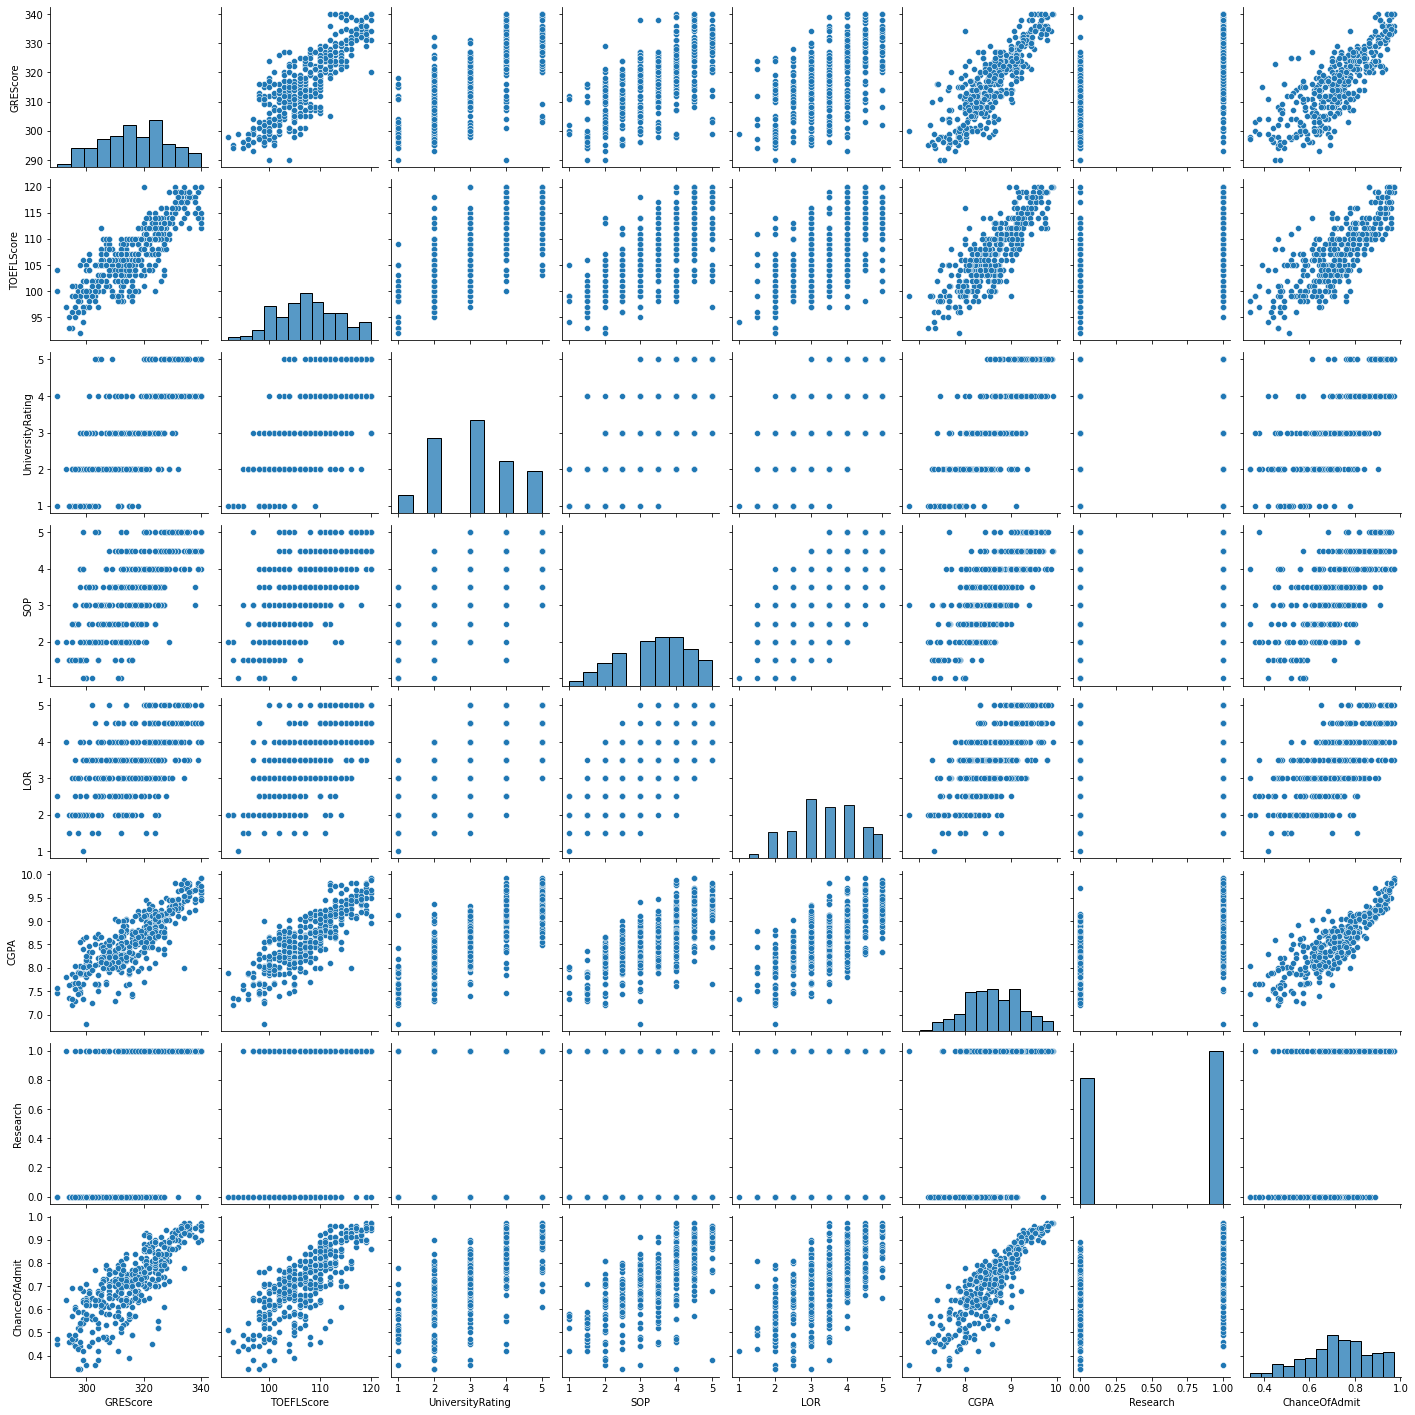

In [125]:
sns.pairplot(adm)
plt.show()

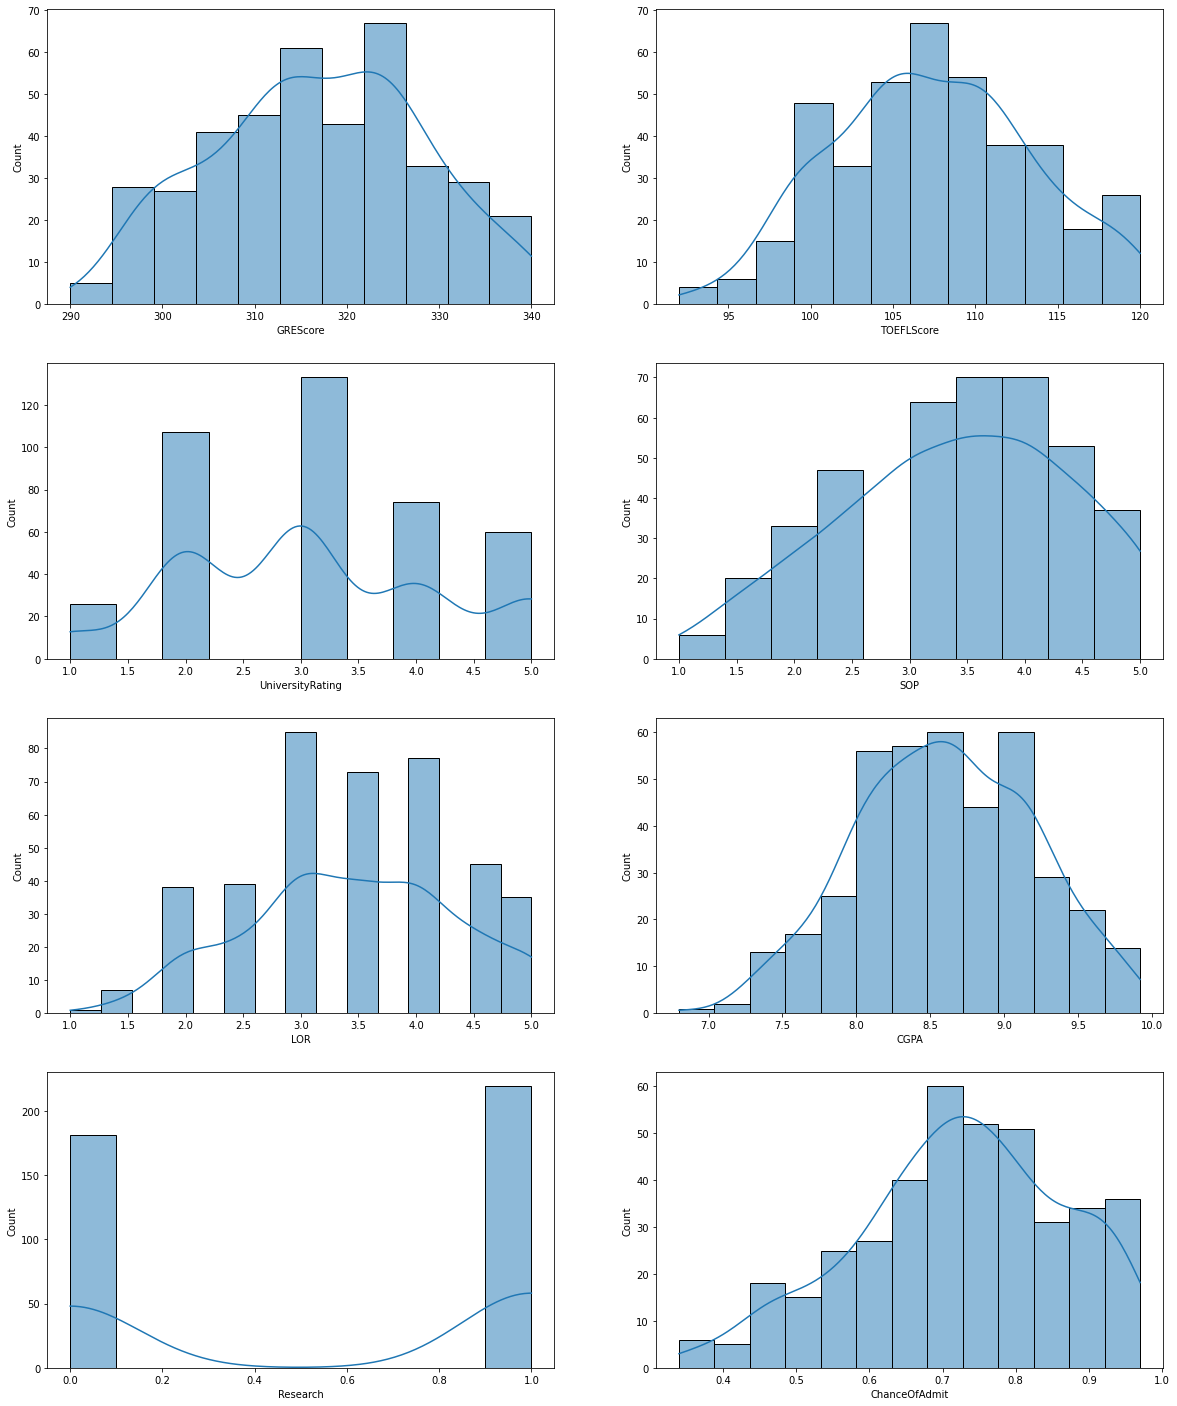

In [126]:
plt.figure(figsize=(20,25))
i = 0
for item in adm.columns:
    i += 1
    plt.subplot(4, 2, i)
    sns.histplot(adm[item],kde=True)
plt.show()

<AxesSubplot:>

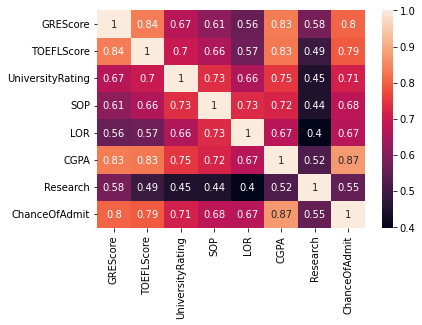

In [127]:
print()
adm.corr()
sns.heatmap(adm.corr(),annot=True)

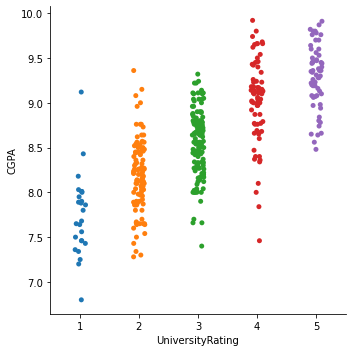

In [128]:
sns.catplot(y="CGPA", x="UniversityRating", data=adm) #can add hue
plt.show()

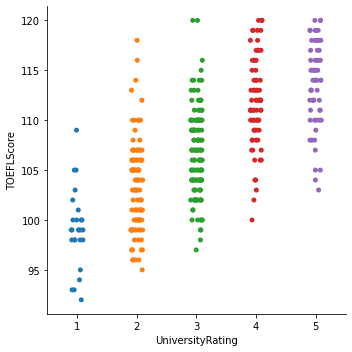

In [129]:
sns.catplot(y="TOEFLScore", x="UniversityRating", data=adm) #can add hue
plt.show()

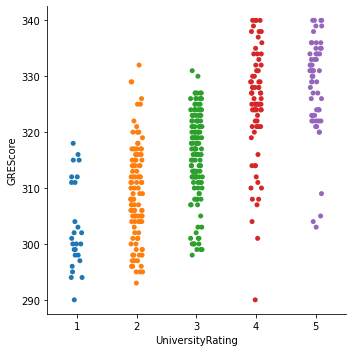

In [130]:
sns.catplot(y="GREScore", x="UniversityRating",data=adm) #can add hue
plt.show()

### GRE Score Analysis:

In [131]:
print("Max GRE Score :",max(adm.GREScore))
print("Min GRE Score :",min(adm.GREScore))

Max GRE Score : 340
Min GRE Score : 290


In [132]:
maxvalues=adm[adm.GREScore>=325]
meanvalues=adm[(adm.GREScore>305)&(adm.GREScore<325)]
minvalues=adm[(adm.GREScore<=305)]

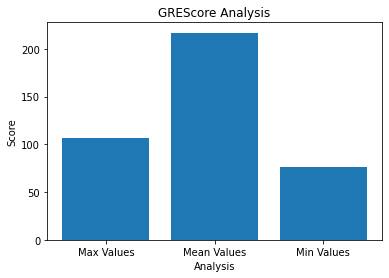

In [133]:
y=np.array([len(maxvalues),len(meanvalues),len(minvalues)])
x=['Max Values','Mean Values','Min Values']
plt.bar(x,y)
plt.title('GREScore Analysis')
plt.xlabel('Analysis')
plt.ylabel('Score')
plt.show()

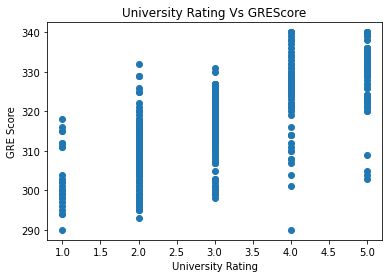

In [134]:
plt.scatter(x='UniversityRating',y='GREScore',data=adm)
plt.xlabel('University Rating')
plt.ylabel('GRE Score')
plt.title('University Rating Vs GREScore')
plt.show()

### TOEFL Score Analysis:

In [135]:
print("Min TOEFLScore :",min(adm.TOEFLScore))
print("Max TOEFLScore :",max(adm.TOEFLScore))

Min TOEFLScore : 92
Max TOEFLScore : 120


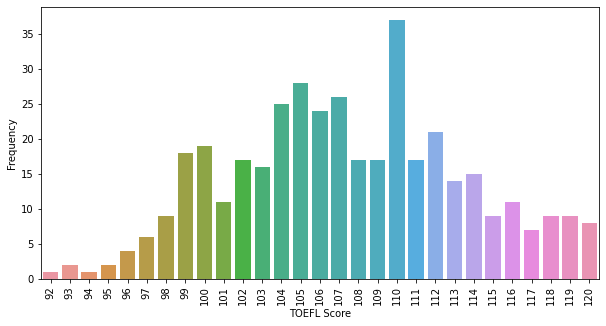

In [136]:
plt.figure(figsize=(10,5))
sns.barplot(x=adm.TOEFLScore.value_counts().index,y=adm.TOEFLScore.value_counts().values)
plt.xticks(rotation=90)
plt.xlabel('TOEFL Score')
plt.ylabel('Frequency')
plt.show()

### University Rating Analysis:

In [137]:
adm.UniversityRating.value_counts()

3    133
2    107
4     74
5     60
1     26
Name: UniversityRating, dtype: int64

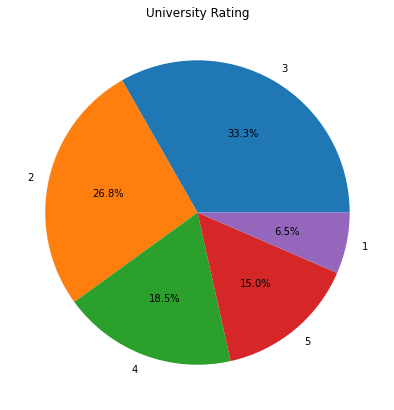

In [138]:
plt.figure(figsize=(7,7))
plt.pie(adm.UniversityRating.value_counts().values,labels=adm.UniversityRating.value_counts().index,autopct='%1.1f%%')
plt.title('University Rating')
plt.show()

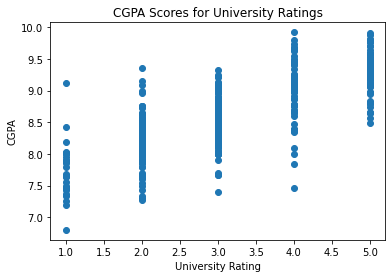

In [139]:
plt.scatter(adm.UniversityRating,adm.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

In [140]:
adm.groupby('UniversityRating')[['SOP','LOR','CGPA']].mean()

,SOP,LOR,CGPA
UniversityRating,,,
1,1.884615,2.211538,7.745769
2,2.705607,2.925234,8.183738
3,3.364662,3.402256,8.552256
4,4.108108,4.006757,9.021622
5,4.500000,4.358333,9.291167


### CGPA Analysis

In [141]:
print("Min CGPA Score :",min(adm.CGPA))
print("Max CGPA Score :",max(adm.CGPA))

Min CGPA Score : 6.8
Max CGPA Score : 9.92


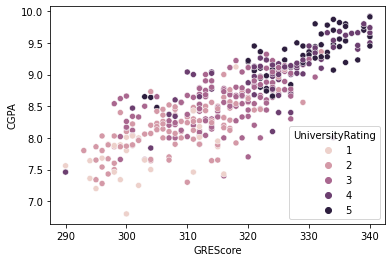

In [142]:
sns.scatterplot(y="CGPA", x="GREScore",hue="UniversityRating",data=adm)
plt.show()

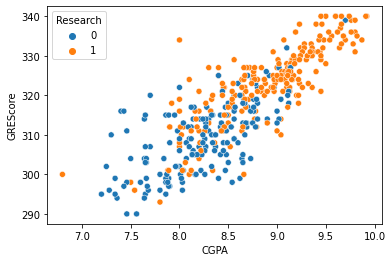

In [143]:
sns.scatterplot(x="CGPA", y="GREScore",hue="Research", data=adm)
plt.show()

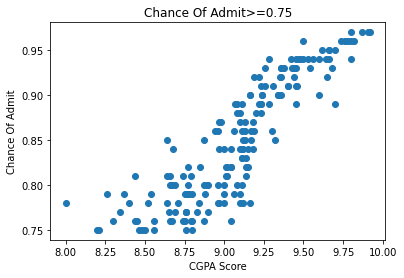

In [144]:
plt.scatter(x=adm[adm.ChanceOfAdmit >=0.75].CGPA,y=adm[adm.ChanceOfAdmit >=0.75].ChanceOfAdmit)
plt.xlabel("CGPA Score")
plt.ylabel("Chance Of Admit")
plt.title("Chance Of Admit>=0.75")
plt.show()

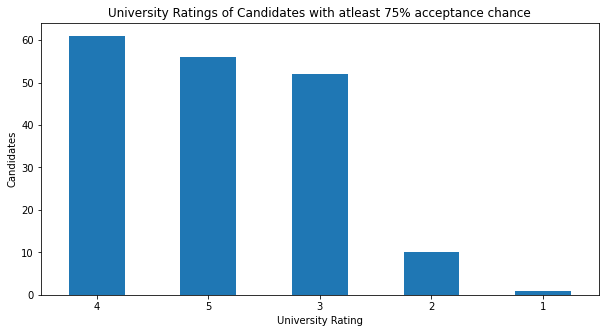

In [145]:
s = adm[adm["ChanceOfAdmit"] >= 0.75]["UniversityRating"].value_counts()
plt.title("University Ratings of Candidates with atleast 75% acceptance chance")
s.plot(kind='bar',figsize=(10, 5))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.xticks(rotation=360)
plt.show()

### EDA of new data (adm1)

In [146]:
adm1.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


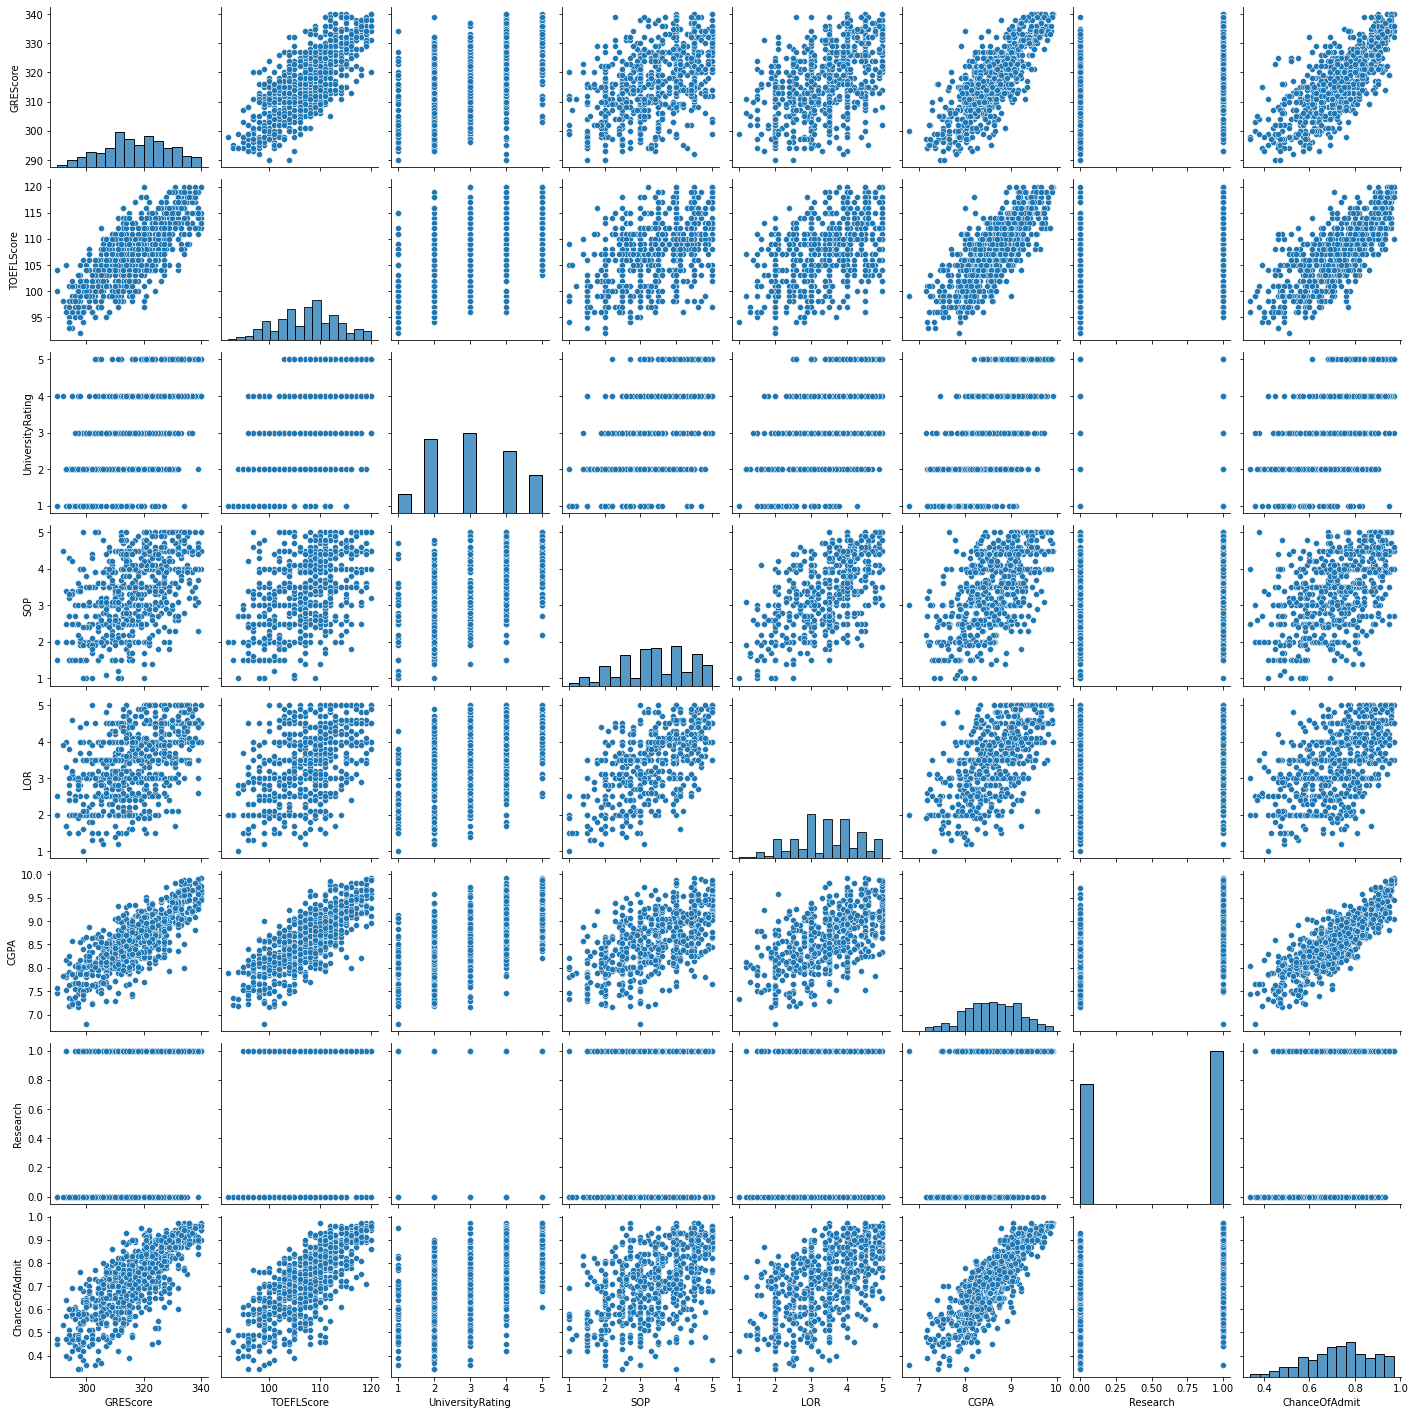

In [147]:
sns.pairplot(adm1)
plt.show()

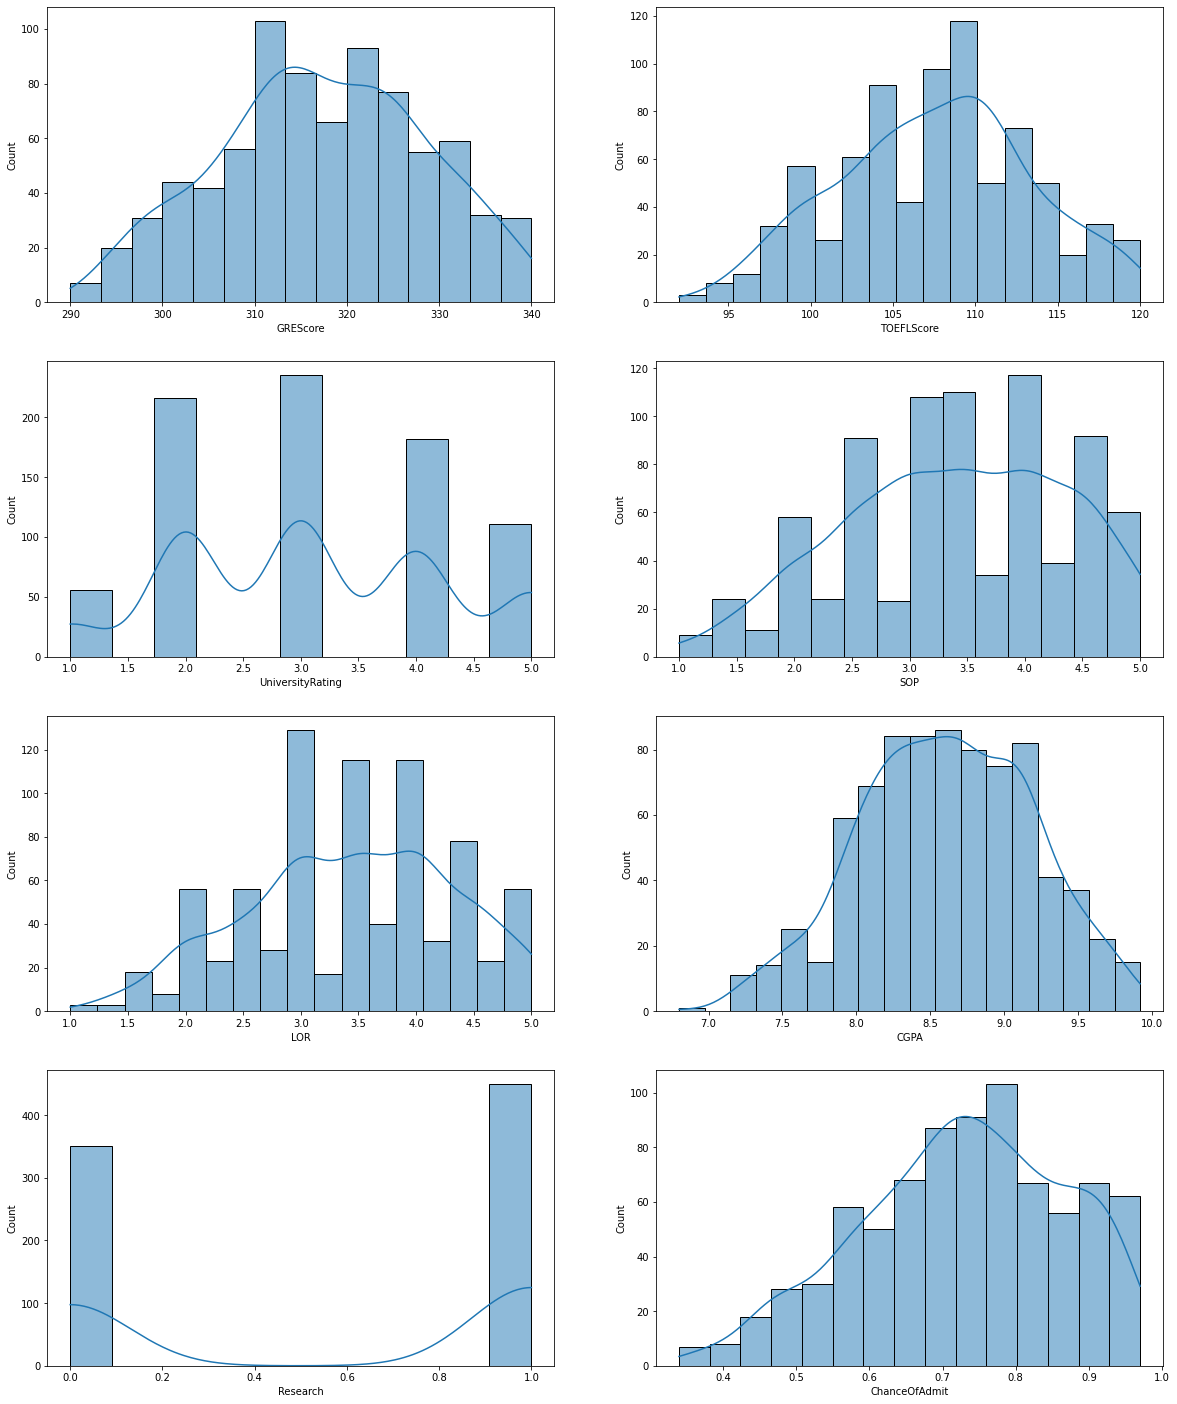

In [148]:
plt.figure(figsize=(20,25))
i = 0
for item in adm1.columns:
    i += 1
    plt.subplot(4, 2, i)
    sns.histplot(adm1[item],kde=True)
plt.show()

<AxesSubplot:>

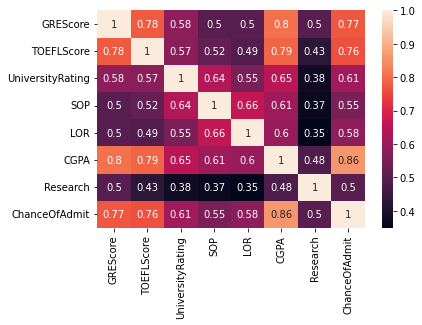

In [149]:
print()
adm1.corr()
sns.heatmap(adm1.corr(),annot=True)

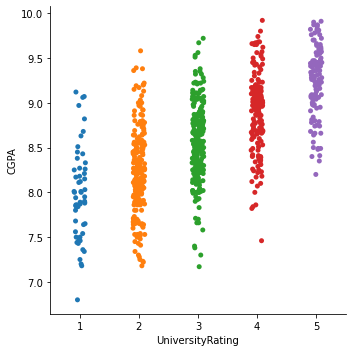

In [150]:
sns.catplot(y="CGPA", x="UniversityRating", data=adm1) #can add hue
plt.show()

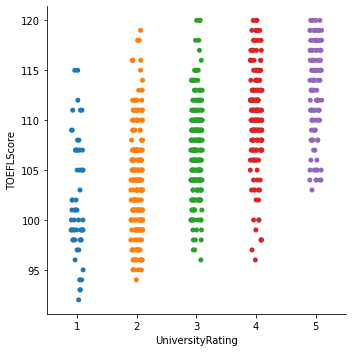

In [151]:
sns.catplot(y="TOEFLScore", x="UniversityRating", data=adm1) #can add hue
plt.show()

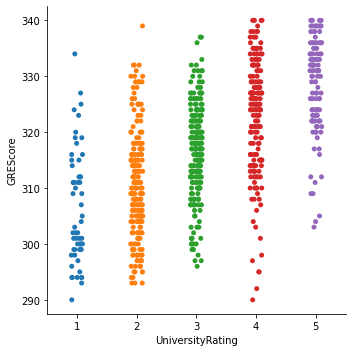

In [152]:
sns.catplot(y="GREScore", x="UniversityRating",data=adm1) #can add hue
plt.show()

### EDA of new data (adm2)

In [153]:
adm2.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


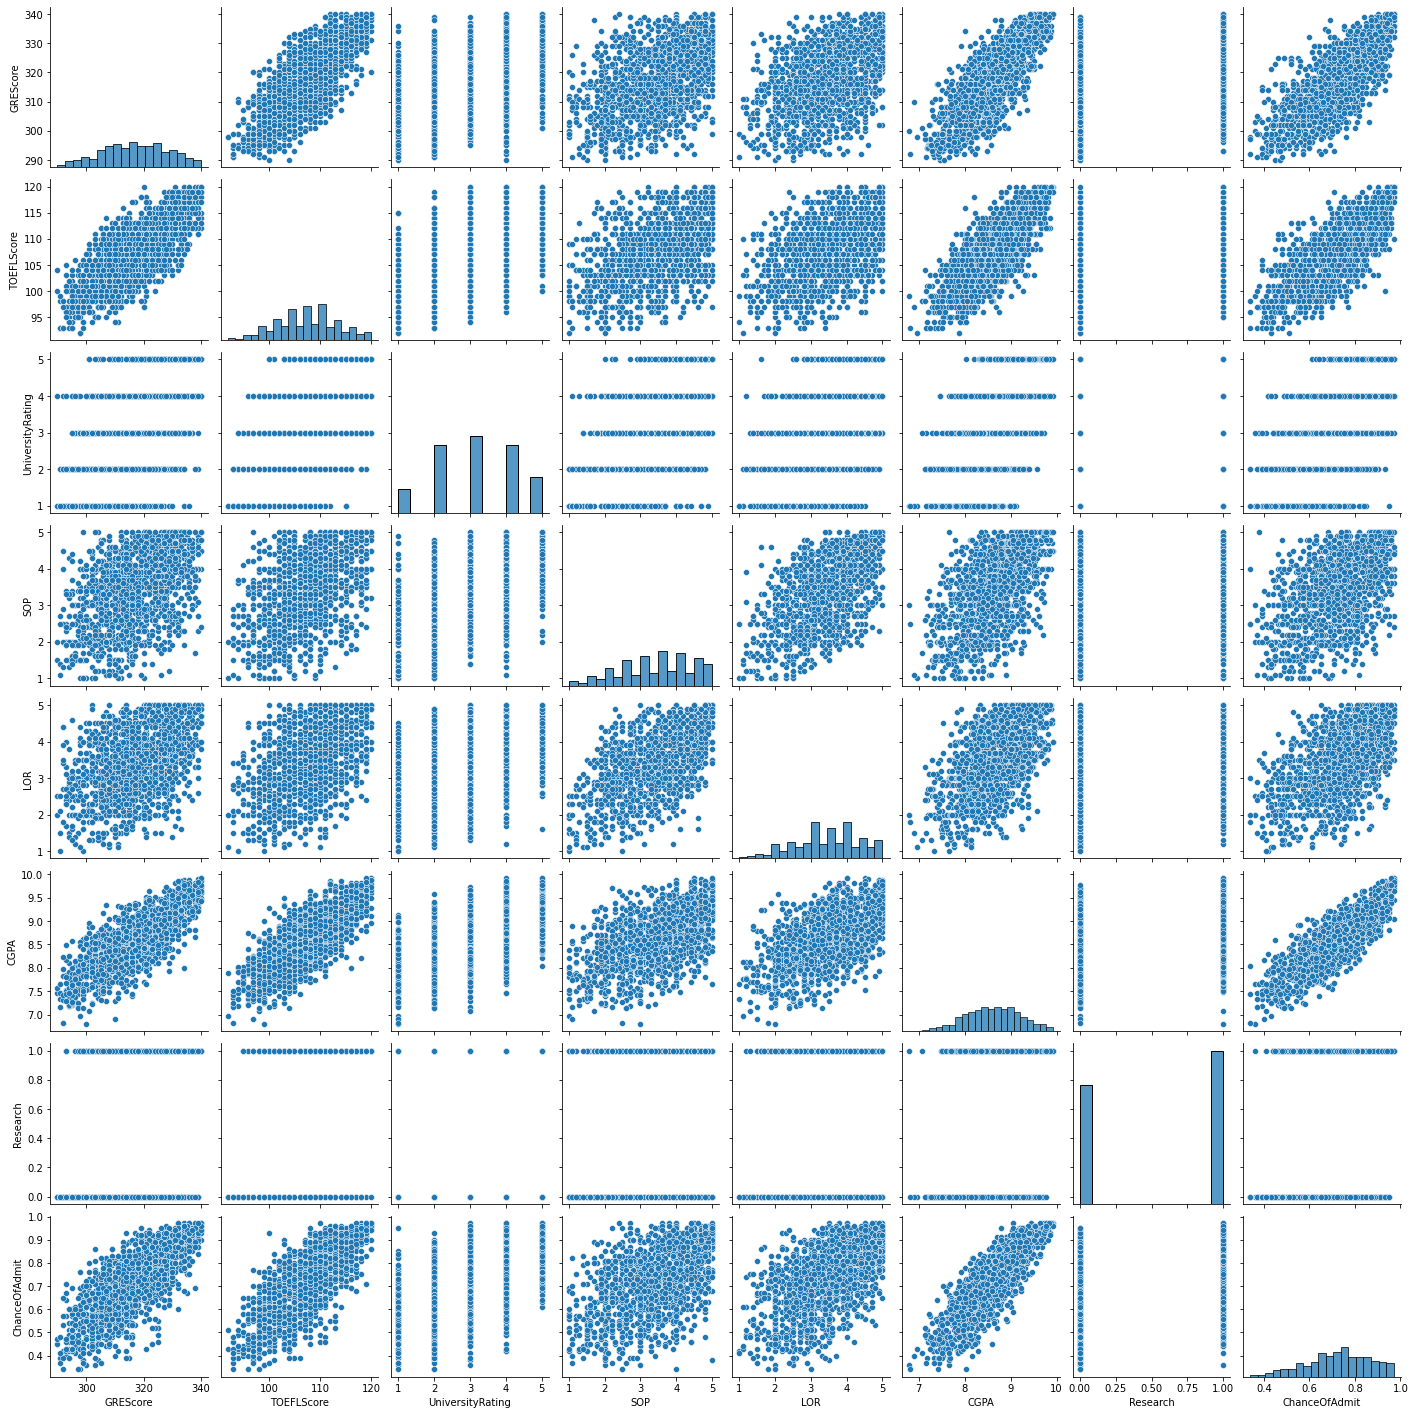

In [154]:
sns.pairplot(adm2)
plt.show()

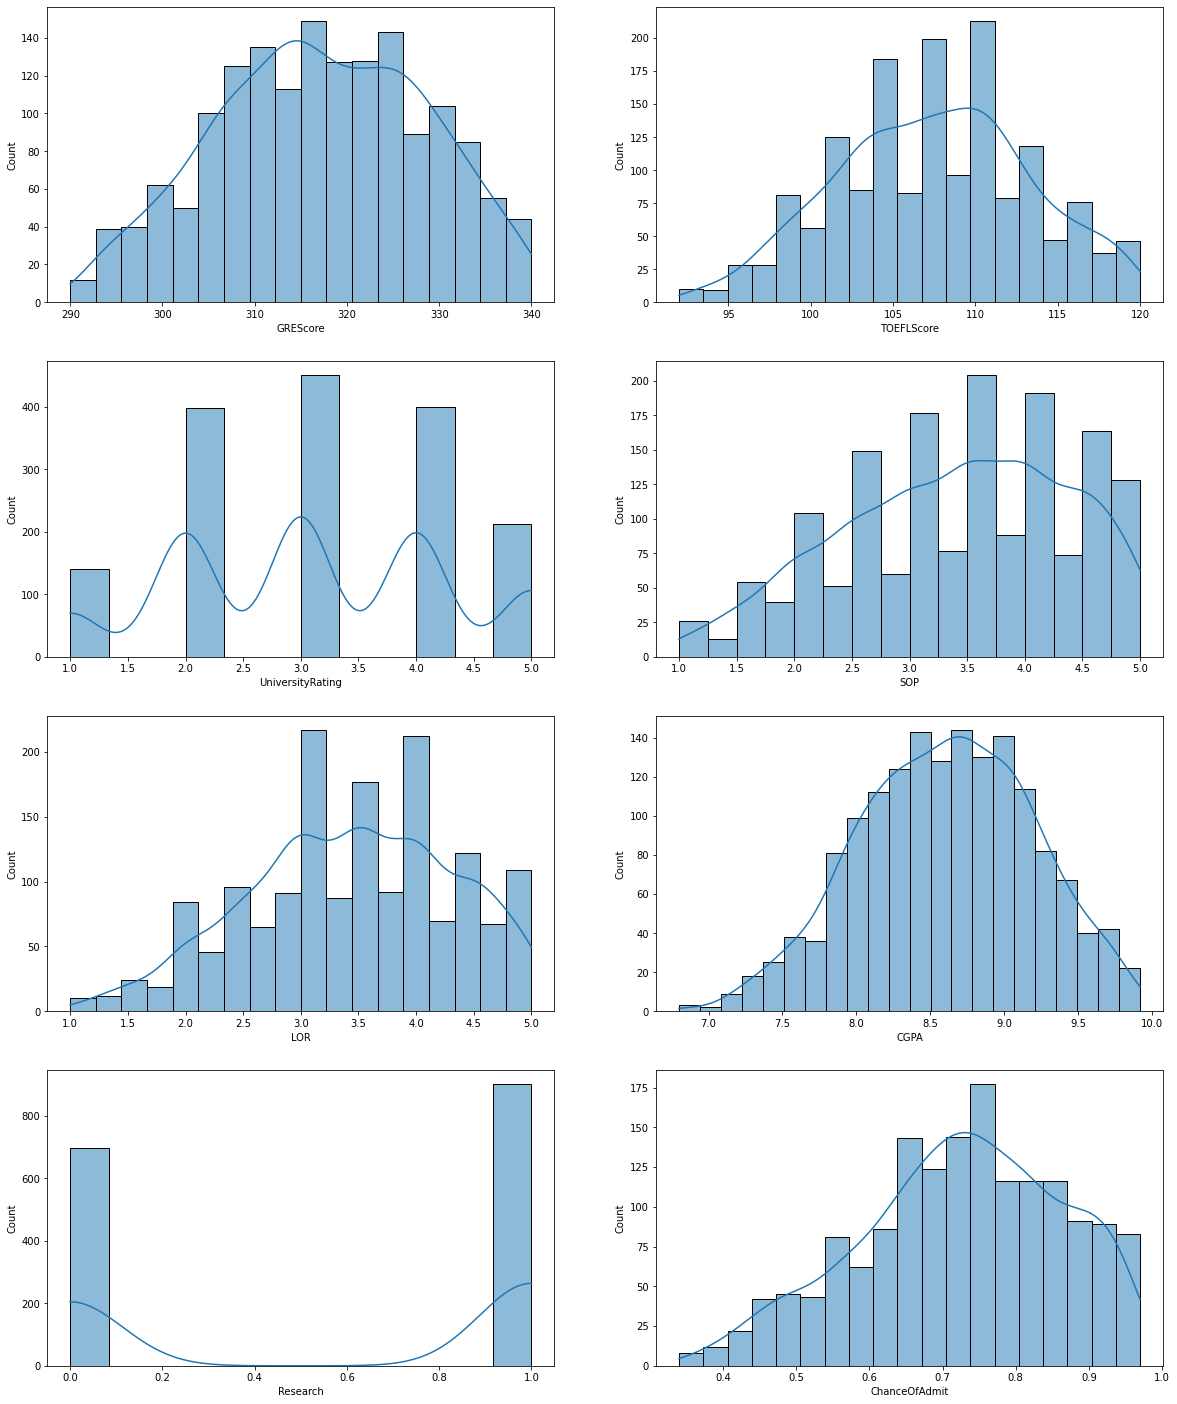

In [155]:
plt.figure(figsize=(20,25))
i = 0
for item in adm2.columns:
    i += 1
    plt.subplot(4, 2, i)
    sns.histplot(adm2[item],kde=True)
plt.show()

<AxesSubplot:>

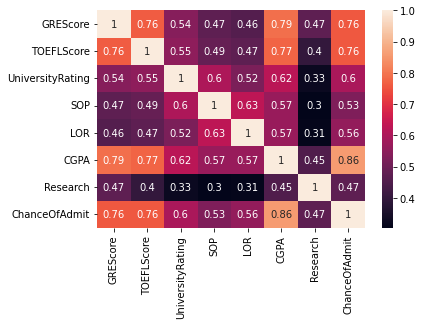

In [156]:
adm2.corr()
sns.heatmap(adm2.corr(),annot=True)

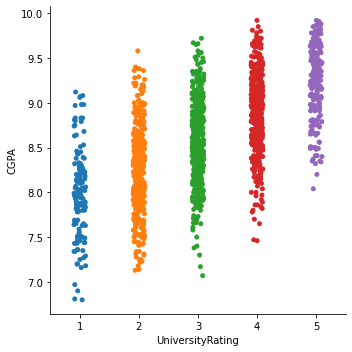

In [157]:
sns.catplot(y="CGPA", x="UniversityRating", data=adm2) #can add hue
plt.show()

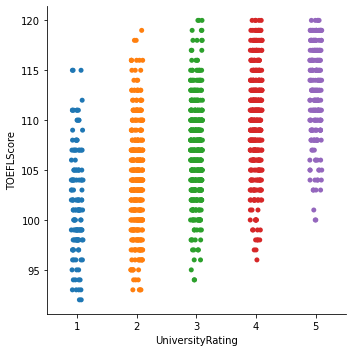

In [158]:
sns.catplot(y="TOEFLScore", x="UniversityRating", data=adm2) #can add hue
plt.show()

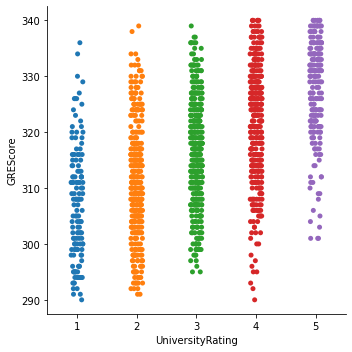

In [159]:
sns.catplot(y="GREScore", x="UniversityRating",data=adm2) #can add hue
plt.show()

### Comparing description of datasets (Original and synthetically modified)

In [160]:
admdes = adm.describe()

In [161]:
admdes1 = adm1.describe()

In [162]:
admdes2 = adm2.describe()

In [163]:
admdes.compare(admdes1, align_axis=1, keep_shape=False, keep_equal=False)

GREScore              TOEFLScore             UniversityRating  \
             self       other        self       other             self   
count  400.000000  800.000000  400.000000  800.000000       400.000000   
mean   316.807500  317.198750  107.410000  107.568750         3.087500   
std     11.473646   11.231961    6.069514    5.899897         1.143728   
25%    308.000000  309.750000  103.000000  104.000000              NaN   
50%           NaN         NaN  107.000000  108.000000              NaN   
75%    325.000000  325.250000         NaN         NaN              NaN   

                          SOP                     LOR                    CGPA  \
            other        self       other        self       other        self   
count  800.000000  400.000000  800.000000  400.000000  800.000000  400.000000   
mean     3.095000    3.400000    3.396625    3.452500    3.436750    8.598925   
std      1.151144    1.006869    0.963463    0.898478    0.891806    0.596317   
25%           NaN    2.500000    2.700000    3.000000    2.900000    8.170000   
50%           NaN         NaN         NaN         NaN         NaN    8.610000   
75%           NaN    4.000000    4.100000         NaN         NaN    9.062500   

                     Research             ChanceOfAdmit              
            other        self       other          self       other  
count  800.000000  400.000000  800.000000    400.000000  800.000000  
mean     8.608775    0.547500    0.561250      0.724350    0.727788  
std      0.580883    0.498362    0.496545      0.142609    0.139776  
25%      8.207500         NaN         NaN           NaN         NaN  
50%      8.635000         NaN         NaN           NaN         NaN  
75%      9.050000         NaN         NaN      0.830000    0.840000

In [164]:
admdes.compare(admdes2, align_axis=1, keep_shape=False, keep_equal=False)

GREScore               TOEFLScore              UniversityRating  \
             self        other        self        other             self   
count  400.000000  1600.000000  400.000000  1600.000000       400.000000   
mean   316.807500   317.131875  107.410000   107.461875         3.087500   
std     11.473646    11.370974    6.069514     5.905959         1.143728   
25%    308.000000   309.000000         NaN          NaN              NaN   
50%           NaN          NaN  107.000000   108.000000              NaN   
75%    325.000000   326.000000         NaN          NaN              NaN   

                           SOP                      LOR               \
             other        self        other        self        other   
count  1600.000000  400.000000  1600.000000  400.000000  1600.000000   
mean      3.091875    3.400000     3.397187    3.452500     3.436562   
std       1.171769    1.006869     0.982370    0.898478     0.889657   
25%            NaN    2.500000     2.700000    3.000000     2.800000   
50%            NaN         NaN          NaN         NaN          NaN   
75%            NaN    4.000000     4.200000    4.000000     4.100000   

             CGPA                 Research              ChanceOfAdmit  \
             self        other        self        other          self   
count  400.000000  1600.000000  400.000000  1600.000000    400.000000   
mean     8.598925     8.606187    0.547500     0.563125      0.724350   
std      0.596317     0.586979    0.498362     0.496154      0.142609   
25%      8.170000     8.190000         NaN          NaN      0.640000   
50%      8.610000     8.630000         NaN          NaN           NaN   
75%      9.062500     9.040000         NaN          NaN           NaN   

                    
             other  
count  1600.000000  
mean      0.724719  
std       0.139158  
25%       0.630000  
50%            NaN  
75%            NaN

## Using Different Models

In [193]:
X=adm.drop(['ChanceOfAdmit'],axis=1)
y=adm['ChanceOfAdmit']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#min max scaling
X_train = (X_train - np.min(X_train))/(np.max(X_train)-np.min(X_train)) * 10
X_test = (X_test - np.min(X_test))/(np.max(X_test)-np.min(X_test)) * 10

In [194]:
X1=adm1.drop(['ChanceOfAdmit'],axis=1)
y1=adm1['ChanceOfAdmit']

#train test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

#min max scaling
X1_train = (X1_train - np.min(X1_train))/(np.max(X1_train)-np.min(X1_train)) * 10
X1_test = (X1_test - np.min(X1_test))/(np.max(X1_test)-np.min(X1_test)) * 10

In [195]:
X2=adm2.drop(['ChanceOfAdmit'],axis=1)
y2=adm2['ChanceOfAdmit']

#train test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

#min max scaling
X2_train = (X2_train - np.min(X2_train))/(np.max(X2_train)-np.min(X2_train)) * 10
X2_test = (X2_test - np.min(X2_test))/(np.max(X2_test)-np.min(X2_test)) * 10

In [196]:
from sklearn.linear_model import LinearRegression
lir=LinearRegression()

from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor() 

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 300)

from sklearn.neighbors import KNeighborsRegressor
knn3 = KNeighborsRegressor(n_neighbors=3)
knn11 = KNeighborsRegressor(n_neighbors=11)

In [197]:
ModelList = (lir,dtr,rfr,knn3,knn11)

****************************************************************************************************
LinearRegression()


Score For Train Data : 0.8221063439698572
Score For Test Data : 0.6712219127058386
The mean absolute error: 0.05669363159395597
The mean squared error: 0.0056583599263978265
The root mean squared error: 0.0752220707398954
The R2 Score: 0.6712219127058386




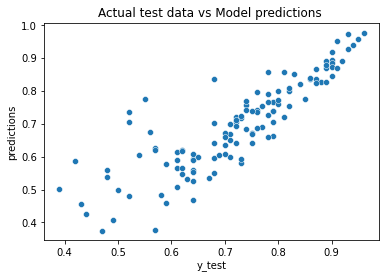



****************************************************************************************************
DecisionTreeRegressor()


Score For Train Data : 1.0
Score For Test Data : 0.24352342896017776
The mean absolute error: 0.08641666666666667
The mean squared error: 0.013019166666666667
The root mean squared error: 0.11410156294576629
The R2 Score: 0.24352342896017776




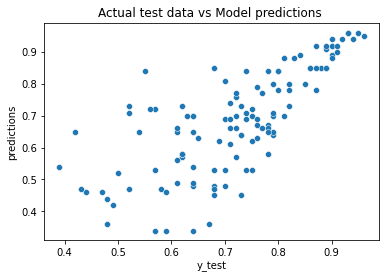



****************************************************************************************************
RandomForestRegressor(n_estimators=300)


Score For Train Data : 0.9701001619311336
Score For Test Data : 0.5914882454047068
The mean absolute error: 0.06247138888888893
The mean squared error: 0.0070305979351852005
The root mean squared error: 0.08384866090275503
The R2 Score: 0.5914882454047068




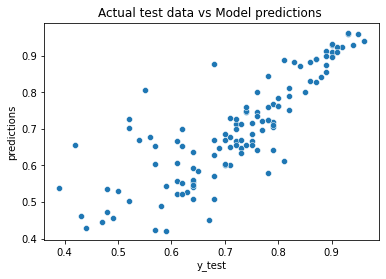



****************************************************************************************************
KNeighborsRegressor(n_neighbors=3)


Score For Train Data : 0.8657132767353624
Score For Test Data : 0.6595056488797267
The mean absolute error: 0.05672222222222222
The mean squared error: 0.00586
The root mean squared error: 0.07655063683601855
The R2 Score: 0.6595056488797267




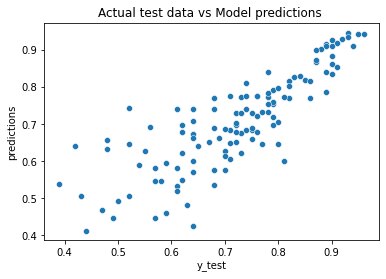



****************************************************************************************************
KNeighborsRegressor(n_neighbors=11)


Score For Train Data : 0.7974690439411217
Score For Test Data : 0.7378431358052627
The mean absolute error: 0.051454545454545454
The mean squared error: 0.0045117906336088155
The root mean squared error: 0.06716986402851219
The R2 Score: 0.7378431358052627




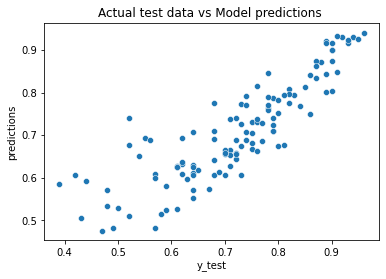

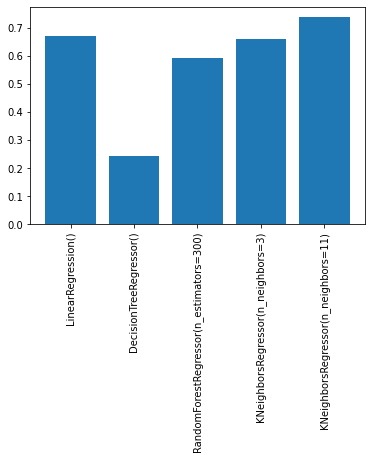

In [198]:
scores1 = {}
for i in ModelList:
  i.fit(X_train,y_train)
  pred = i.predict(X_test)
  print("*"*100)  
  raw = f"{i}"
  print(raw)
  print('\n')
  print('Score For Train Data : {}'.format(i.score(X_train,y_train)))
  print('Score For Test Data : {}'.format(i.score(X_test,y_test)))
  print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred))
  print('The mean squared error:', metrics.mean_squared_error(y_test, pred))
  print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
  r2 = metrics.r2_score(y_test, pred)
  print('The R2 Score:', r2)
  print('\n')
  sns.scatterplot(x=y_test, y=pred);
  plt.xlabel('y_test')
  plt.ylabel('predictions')
  plt.title('Actual test data vs Model predictions ')
  plt.show()
  print('\n')
  scores1[raw] = r2

plt.bar(scores1.keys(),scores1.values())
plt.xticks(rotation=90)
plt.show()

****************************************************************************************************
LinearRegression()


Score For Train Data : 0.7808730154768686
Score For Test Data : 0.6548135512661966
The mean absolute error: 0.06112079899453852
The mean squared error: 0.005885081367334498
The root mean squared error: 0.07671428398502132
The R2 Score: 0.6548135512661966




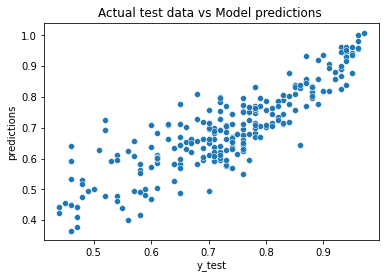



****************************************************************************************************
DecisionTreeRegressor()


Score For Train Data : 1.0
Score For Test Data : 0.31677294398699807
The mean absolute error: 0.08024999999999999
The mean squared error: 0.011648333333333335
The root mean squared error: 0.10792744476421803
The R2 Score: 0.31677294398699807




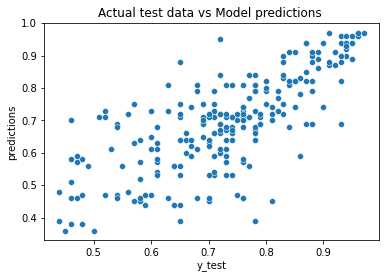



****************************************************************************************************
RandomForestRegressor(n_estimators=300)


Score For Train Data : 0.9659727240315887
Score For Test Data : 0.631073843152189
The mean absolute error: 0.06208319444444456
The mean squared error: 0.006289819486111129
The root mean squared error: 0.07930838219325324
The R2 Score: 0.631073843152189




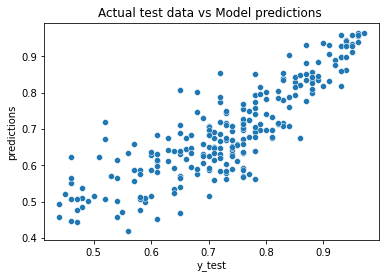



****************************************************************************************************
KNeighborsRegressor(n_neighbors=3)


Score For Train Data : 0.8480282229715348
Score For Test Data : 0.5707794733722871
The mean absolute error: 0.06391666666666666
The mean squared error: 0.007317777777777776
The root mean squared error: 0.08554401076508966
The R2 Score: 0.5707794733722871




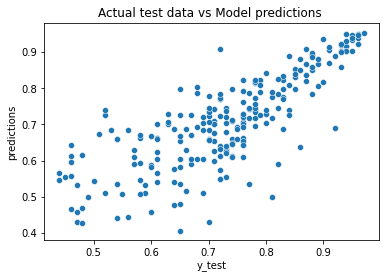



****************************************************************************************************
KNeighborsRegressor(n_neighbors=11)


Score For Train Data : 0.7622360889631383
Score For Test Data : 0.6752882158419269
The mean absolute error: 0.05726893939393939
The mean squared error: 0.005536008953168043
The root mean squared error: 0.07440436111659075
The R2 Score: 0.6752882158419269




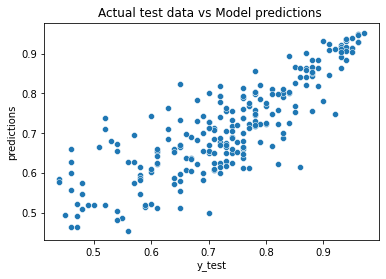

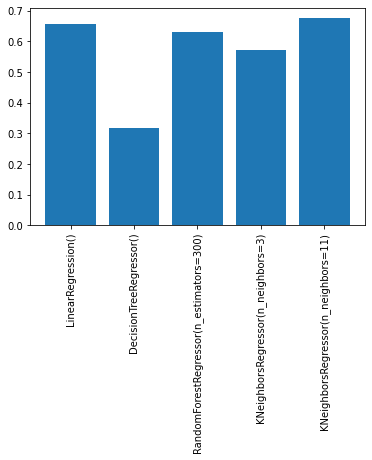

In [199]:
scores2 = {}
for i in ModelList:
  i.fit(X1_train,y1_train)
  pred = i.predict(X1_test)
  print("*"*100)
  raw = f"{i}"
  print(raw)
  print('\n')
  print('Score For Train Data : {}'.format(i.score(X1_train,y1_train)))
  print('Score For Test Data : {}'.format(i.score(X1_test,y1_test)))
  print('The mean absolute error:', metrics.mean_absolute_error(y1_test, pred))
  print('The mean squared error:', metrics.mean_squared_error(y1_test, pred))
  print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y1_test, pred)))
  r2 = metrics.r2_score(y1_test, pred)
  print('The R2 Score:', r2)
  print('\n')
  sns.scatterplot(x=y1_test, y=pred);
  plt.xlabel('y_test')
  plt.ylabel('predictions')
  plt.title('Actual test data vs Model predictions ')
  plt.show()
  print('\n')
  scores2[raw] = r2

plt.bar(scores2.keys(),scores2.values())
plt.xticks(rotation=90)
plt.show()

****************************************************************************************************
LinearRegression()


Score For Train Data : 0.7647444495502247
Score For Test Data : 0.7943127342852199
The mean absolute error: 0.049786540997517
The mean squared error: 0.004041229750978733
The root mean squared error: 0.06357066737874263
The R2 Score: 0.7943127342852199




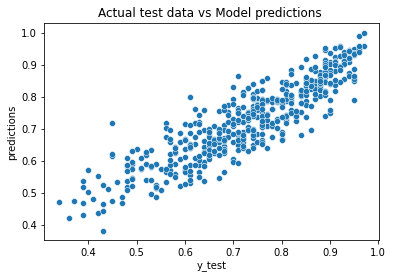



****************************************************************************************************
DecisionTreeRegressor()


Score For Train Data : 1.0
Score For Test Data : 0.5250867400674641
The mean absolute error: 0.07512500000000001
The mean squared error: 0.009330833333333333
The root mean squared error: 0.0965962387121431
The R2 Score: 0.5250867400674641




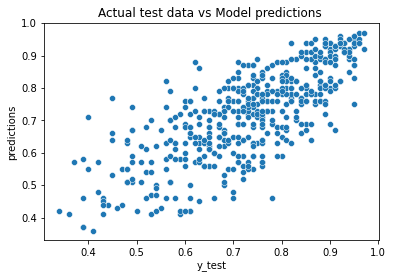



****************************************************************************************************
RandomForestRegressor(n_estimators=300)


Score For Train Data : 0.9636376720065202
Score For Test Data : 0.749251067911477
The mean absolute error: 0.05460868055555559
The mean squared error: 0.004926576474537042
The root mean squared error: 0.07018957525542552
The R2 Score: 0.749251067911477




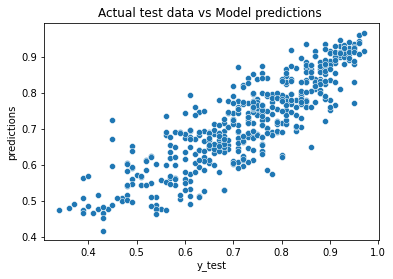



****************************************************************************************************
KNeighborsRegressor(n_neighbors=3)


Score For Train Data : 0.8342519087486286
Score For Test Data : 0.6947452407163113
The mean absolute error: 0.058076388888888886
The mean squared error: 0.005997476851851852
The root mean squared error: 0.07744337836026946
The R2 Score: 0.6947452407163113




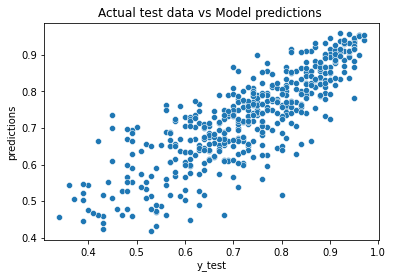



****************************************************************************************************
KNeighborsRegressor(n_neighbors=11)


Score For Train Data : 0.7628715757158555
Score For Test Data : 0.728478002445776
The mean absolute error: 0.05527272727272727
The mean squared error: 0.005334714187327823
The root mean squared error: 0.07303912778318086
The R2 Score: 0.728478002445776




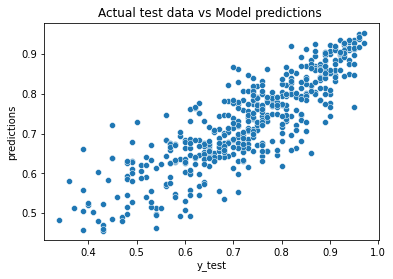

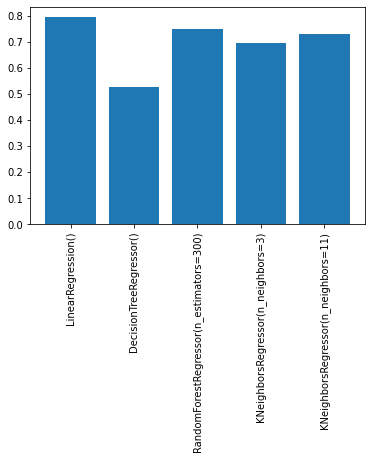

In [200]:
scores3 = {}
for i in ModelList:
  i.fit(X2_train,y2_train)
  pred = i.predict(X2_test)
  print("*"*100)
  raw = f"{i}"
  print(i)
  print('\n')
  print('Score For Train Data : {}'.format(i.score(X2_train,y2_train)))
  print('Score For Test Data : {}'.format(i.score(X2_test,y2_test)))
  print('The mean absolute error:', metrics.mean_absolute_error(y2_test, pred))
  print('The mean squared error:', metrics.mean_squared_error(y2_test, pred))
  print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y2_test, pred)))
  r2 = metrics.r2_score(y2_test, pred)
  print('The R2 Score:', r2)
  print('\n')
  sns.scatterplot(x=y2_test, y=pred);
  plt.xlabel('y_test')
  plt.ylabel('predictions')
  plt.title('Actual test data vs Model predictions ')
  plt.show()
  print('\n')
  scores3[raw] = r2

plt.bar(scores3.keys(),scores3.values())
plt.xticks(rotation=90)
plt.show()

### Comparing model performance on original and synthetically generated datasets.

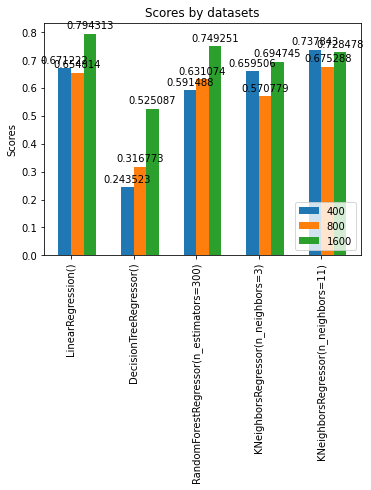

In [201]:
labels = scores1.keys()
ds1 = scores1.values()
ds2 = scores2.values()
ds3 = scores3.values()

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ds1, width, label='400')
rects2 = ax.bar(x + width/2, ds2, width, label='800')
rects3 = ax.bar(x + 3*width/2, ds3, width, label='1600')

ax.set_ylabel('Scores')
ax.set_title('Scores by datasets')
ax.set_xticks(x, labels)
ax.legend(loc='lower right')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
fig.tight_layout()

plt.xticks(rotation=90)
plt.show()

As we can infer from the above graph, Linear Regression Model works best on our dataset!